# TASK #1 UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


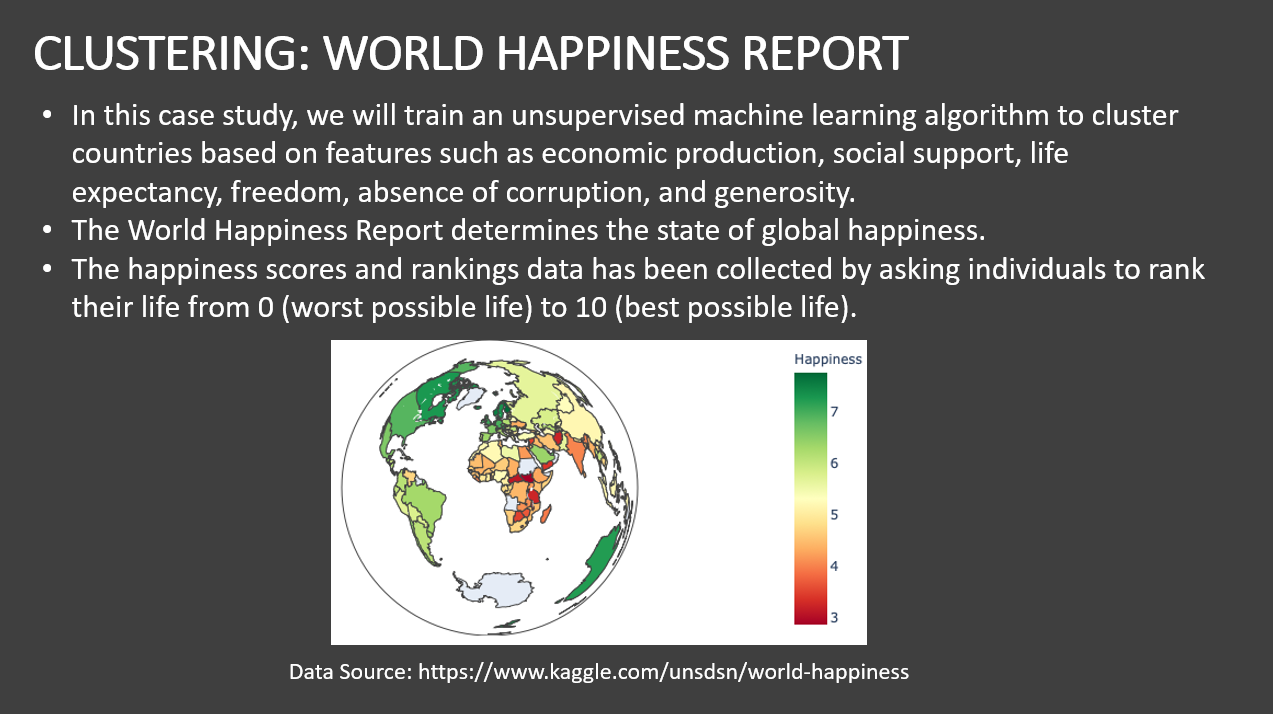

# TASK #2: IMPORT DATASETS AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

In [2]:
# Import csv file into pandas dataframe
happy_df = pd.read_csv('happiness_report.csv')

In [3]:
# print the first 5 rows of the dataframe
happy_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [4]:
# Check the number of non-null values in the dataframe
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [5]:
# Check Null values
happy_df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [6]:
# Obtain the Statistical summary of the dataframe
happy_df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [7]:
# check the number of duplicated entries in the dataframe
happy_df.duplicated().sum() # since there are no duplicates, no further action is required

0

# TASK #4: PERFORM DATA VISUALIZATION - PART #1

<Figure size 2000x2000 with 0 Axes>

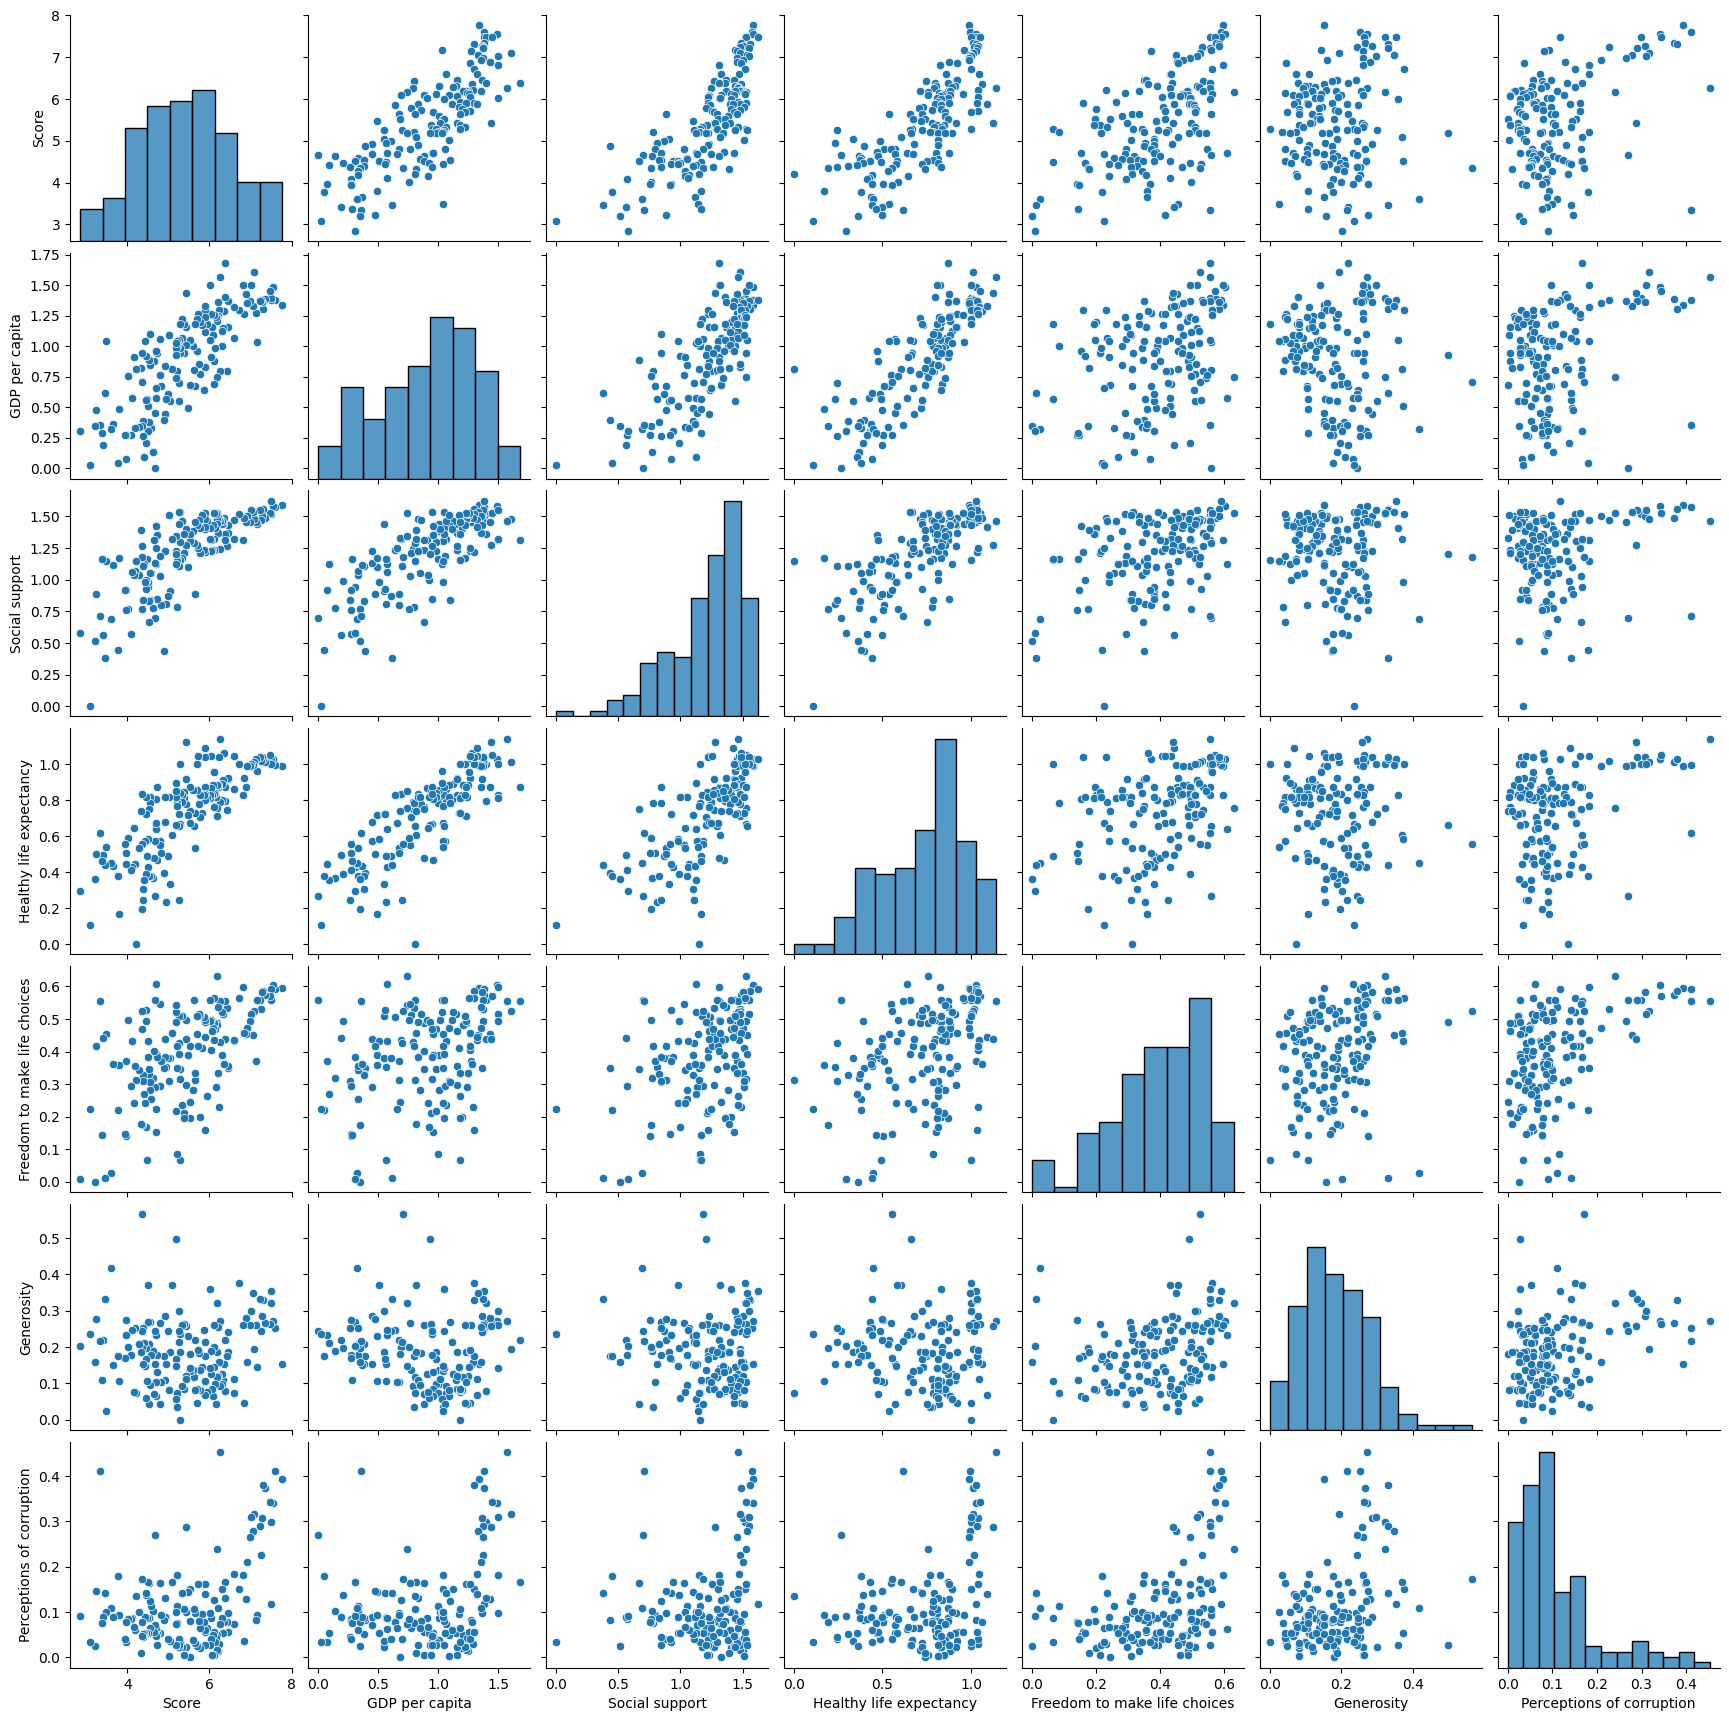

In [8]:
# Plot the pairplot
fig = plt.figure(figsize = (20,20))
sns.pairplot(happy_df[['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])

# Positive correlation between GDP and score 
# Positive correlation between Social Support and score 


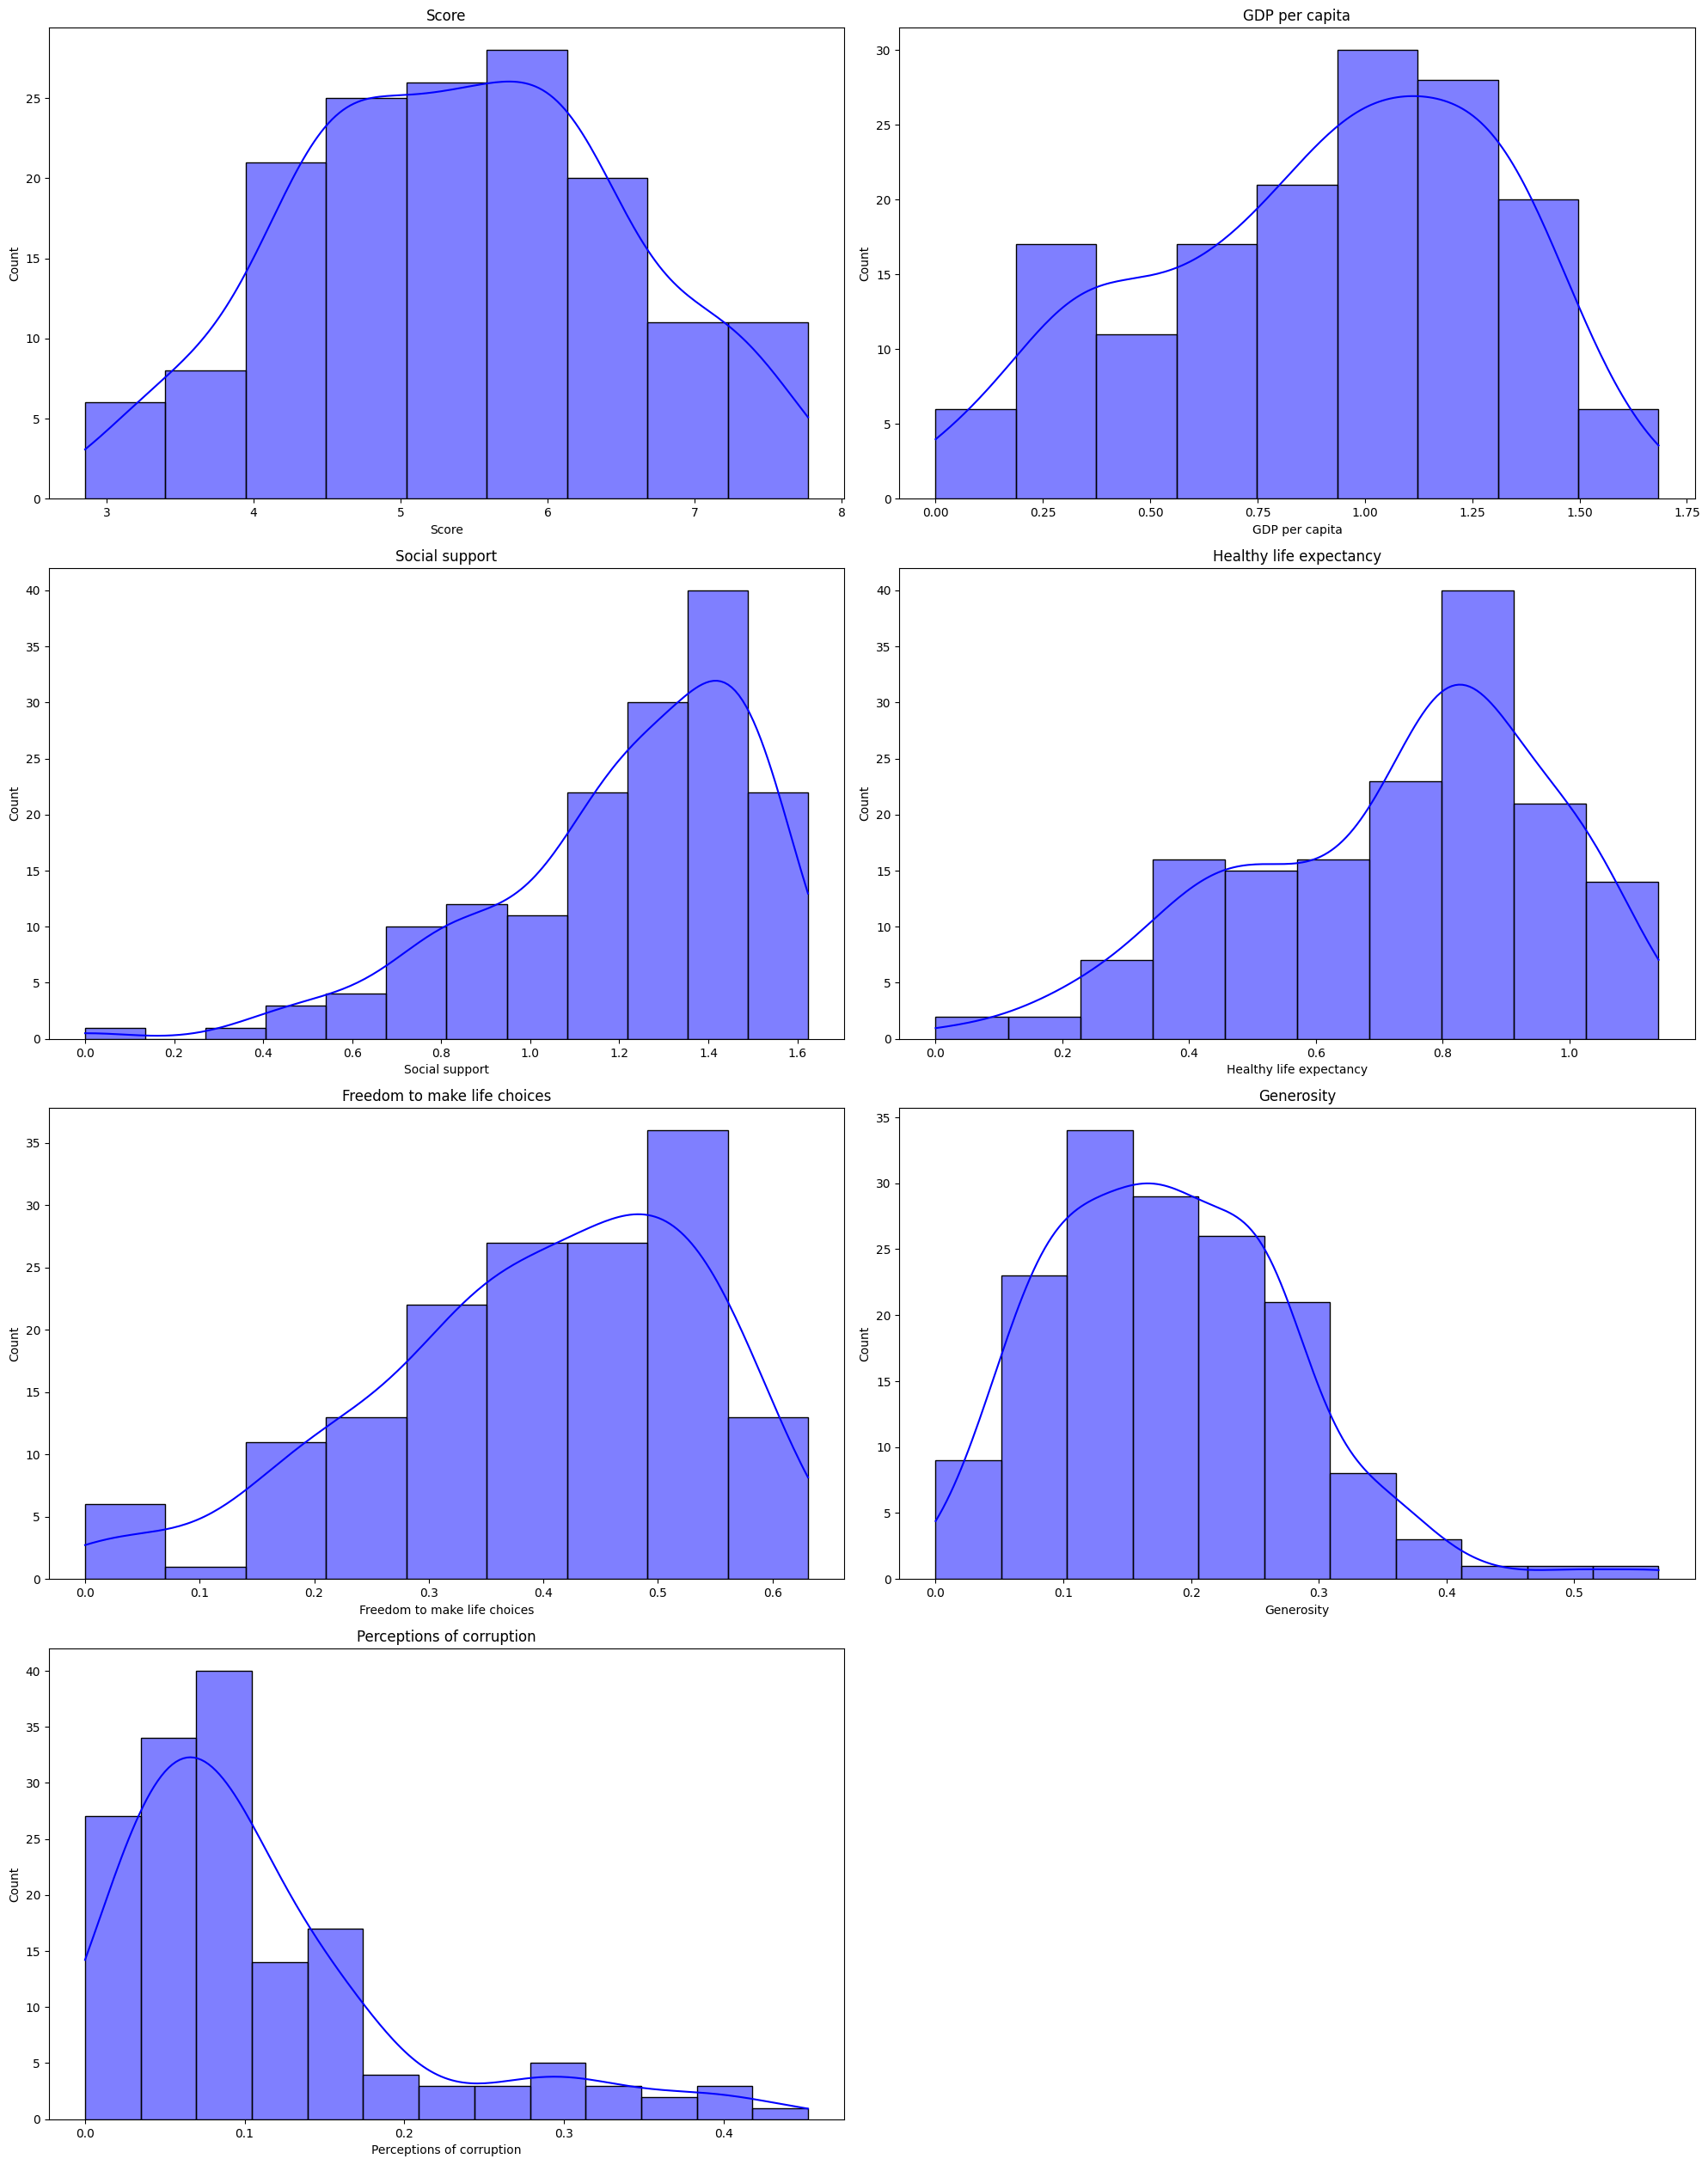

In [9]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(20, 50))
for i in range(len(columns)):
    plt.subplot(8, 2, i+1)
    sns.histplot(happy_df[columns[i]], color='b', kde=True)
    plt.title(columns[i])

plt.tight_layout()


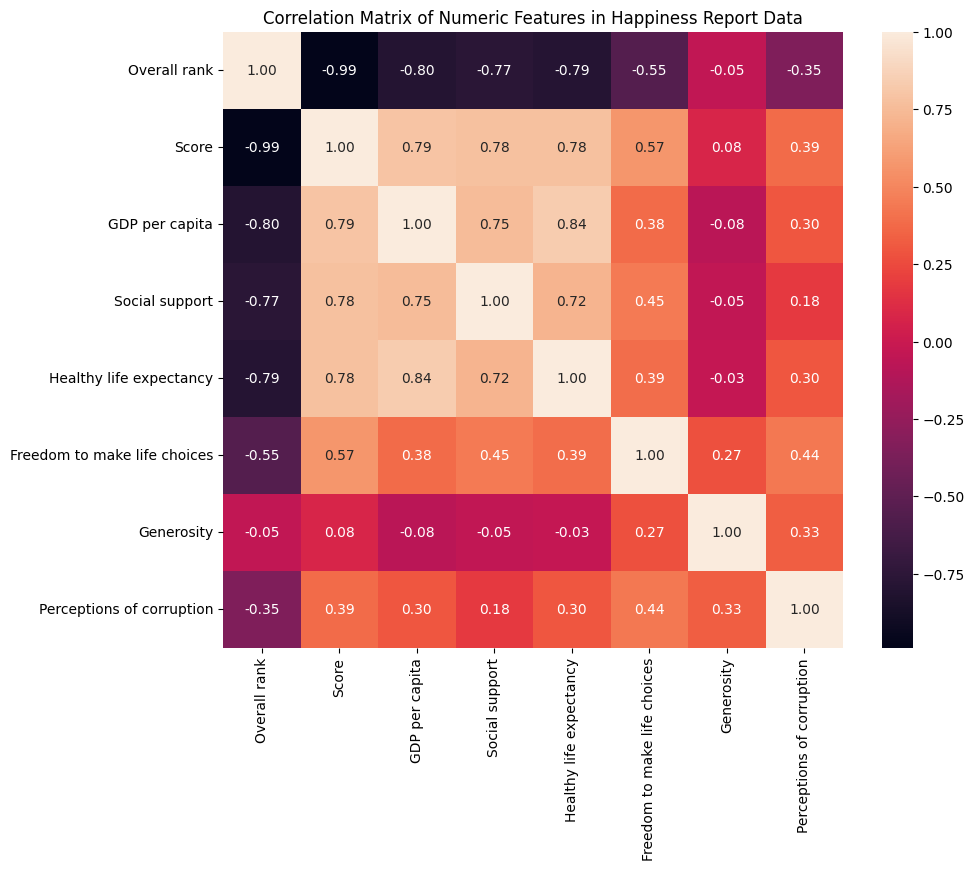

In [10]:
# Select only the numeric columns for correlation
numeric_columns = happy_df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for numeric columns only
corr_matrix = numeric_columns.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Numeric Features in Happiness Report Data")
plt.show()


# TASK #5: PERFORM DATA VISUALIZATION - PART #2

In [11]:
# Plot the relationship between score, GDP and region
fig = px.scatter(happy_df, x = 'GDP per capita', y = 'Score', text = 'Country or region')
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 1000)
fig.show()

In [12]:
# Plot the relationship between score and GDP (while adding color and size)

fig = px.scatter(happy_df, x = "GDP per capita", y = "Score", size = 'Overall rank', color = "Country or region", hover_name = "Country or region")

fig.update_layout(title_text = 'Happiness Score vs GDP per Capita')
fig.show()

In [13]:
# Plot the relationship between score and freedom to make life choices

fig = px.scatter(happy_df, x = 'Freedom to make life choices', y = "Score", size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(title_text = 'Happiness Score vs Freedom to make life choices')
fig.show()

# TASK #6: PREPARE THE DATA TO FEED THE CLUSTERING MODEL

In [14]:
# We are going to create clusters without the use of happiness score and rank to see which countries fall under similar clusters

In [15]:
# Select the data without rank and happiness score
df_seg = happy_df.drop(columns = ['Overall rank', 'Country or region', 'Score'])
df_seg

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


In [16]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_seg)


In [17]:
scaled_data.shape

(156, 6)

# TASK #7: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

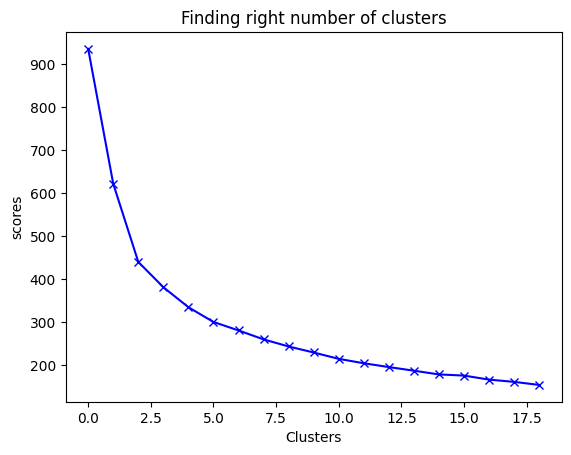

In [18]:
from sklearn.cluster import KMeans

scores = []
range_values = range(1, 20)

for i in range_values:
    # Explicitly setting the n_init parameter
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(scaled_data)
    scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()


# TASK #8: APPLY K-MEANS METHOD

In [19]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(scaled_data)
labels = kmeans.labels_


In [20]:
kmeans.cluster_centers_

array([[ 0.35269748,  0.34811966,  0.39301953, -0.09193823, -0.55644773,
        -0.43733865],
       [-1.26422926, -1.1321435 , -1.24034126, -0.47156319,  0.26057036,
        -0.11435828],
       [ 1.0440483 ,  0.84045675,  0.88671774,  1.04395863,  1.20151704,
         1.46865179]])

In [21]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_seg.columns])
cluster_centers      

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.352697,0.348120,0.393020,-0.091938,-0.556448,-0.437339
1,-1.264229,-1.132144,-1.240341,-0.471563,0.260570,-0.114358
2,1.044048,0.840457,0.886718,1.043959,1.201517,1.468652


In [22]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_seg.columns])
cluster_centers


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.045207,1.312634,0.820098,0.379439,0.132012,0.069390
1,0.403109,0.871174,0.425891,0.325217,0.209587,0.099826
2,1.319750,1.459464,0.939250,0.541679,0.298929,0.249000


- Cluster 0: countries that have GDP in the range of 0.6 to 1.4 and have high social support. These countries have medium life expectancy and have high freedom to make life choices. These counties have low generosity and low perception of corruption.

- Cluster 1: countries that have very high GDP, high social support and high life expectancy. These counties have high freedom to make life choices, medium generosity and medium perception of corruption.

- Cluster 2: countries that have low GDP average life expectancy and average social support. These counties have low freedom to make life choices, high generosity and medium perception of corruption.

In [23]:
print(labels.shape)


(156,)


In [24]:
print(labels.max())


2


In [25]:
print(labels.min())


0


In [26]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0])

In [27]:
# concatenate the clusters labels to our original dataframe
happy_df_cluster = pd.concat([happy_df, pd.DataFrame({'cluster':labels})], axis = 1)
happy_df_cluster

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,1
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,1
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,1


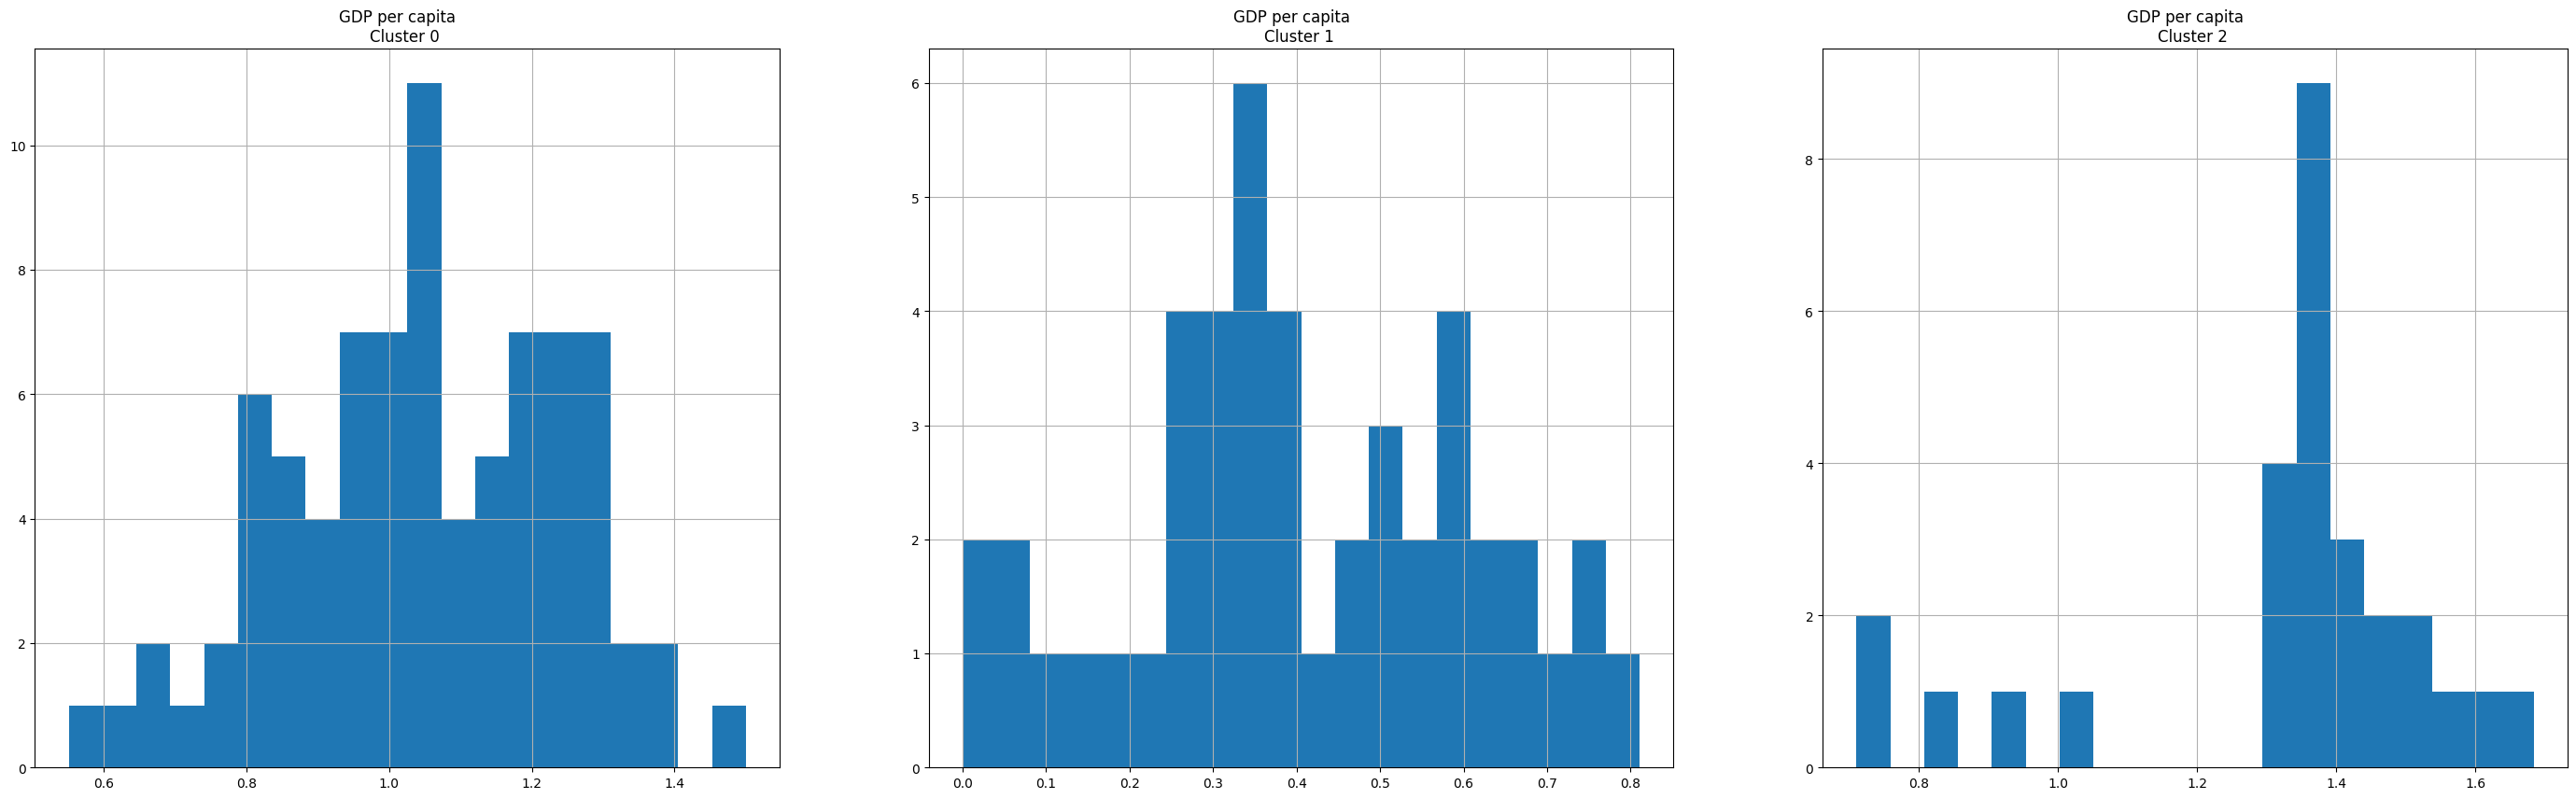

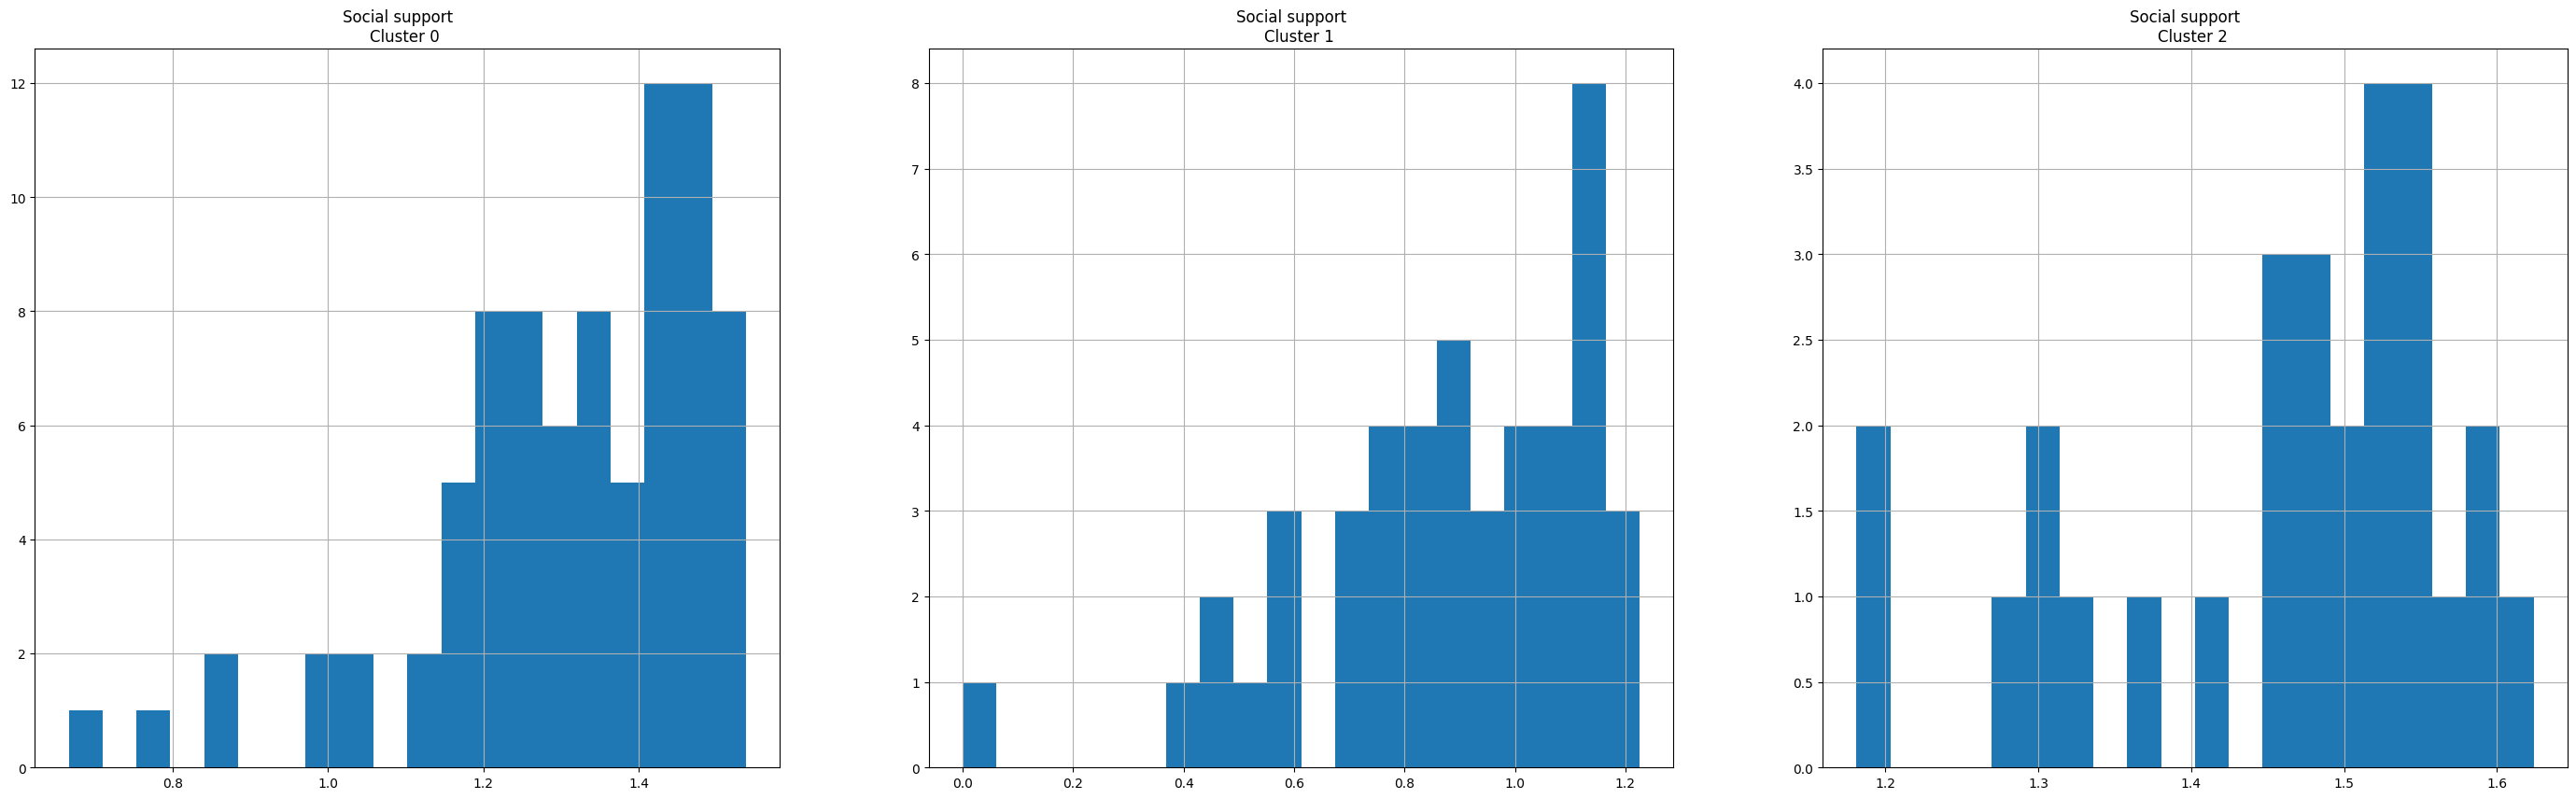

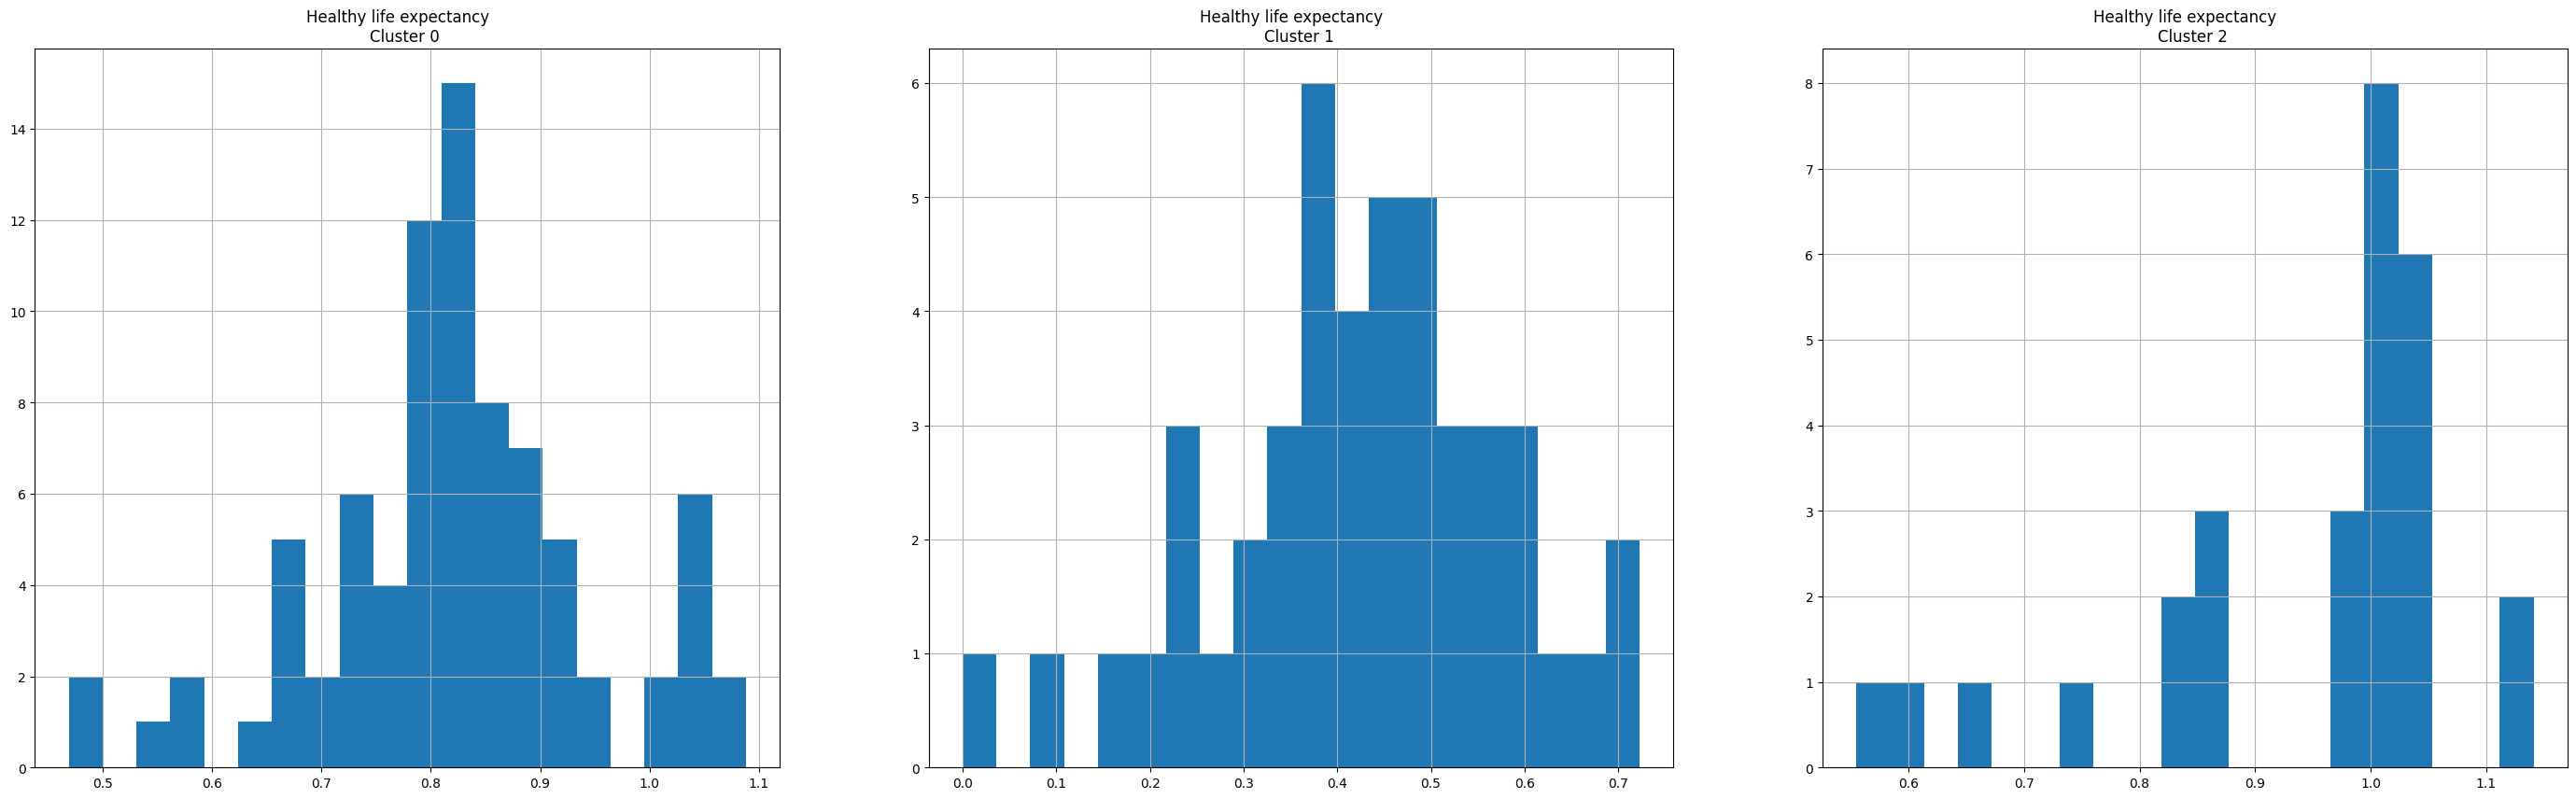

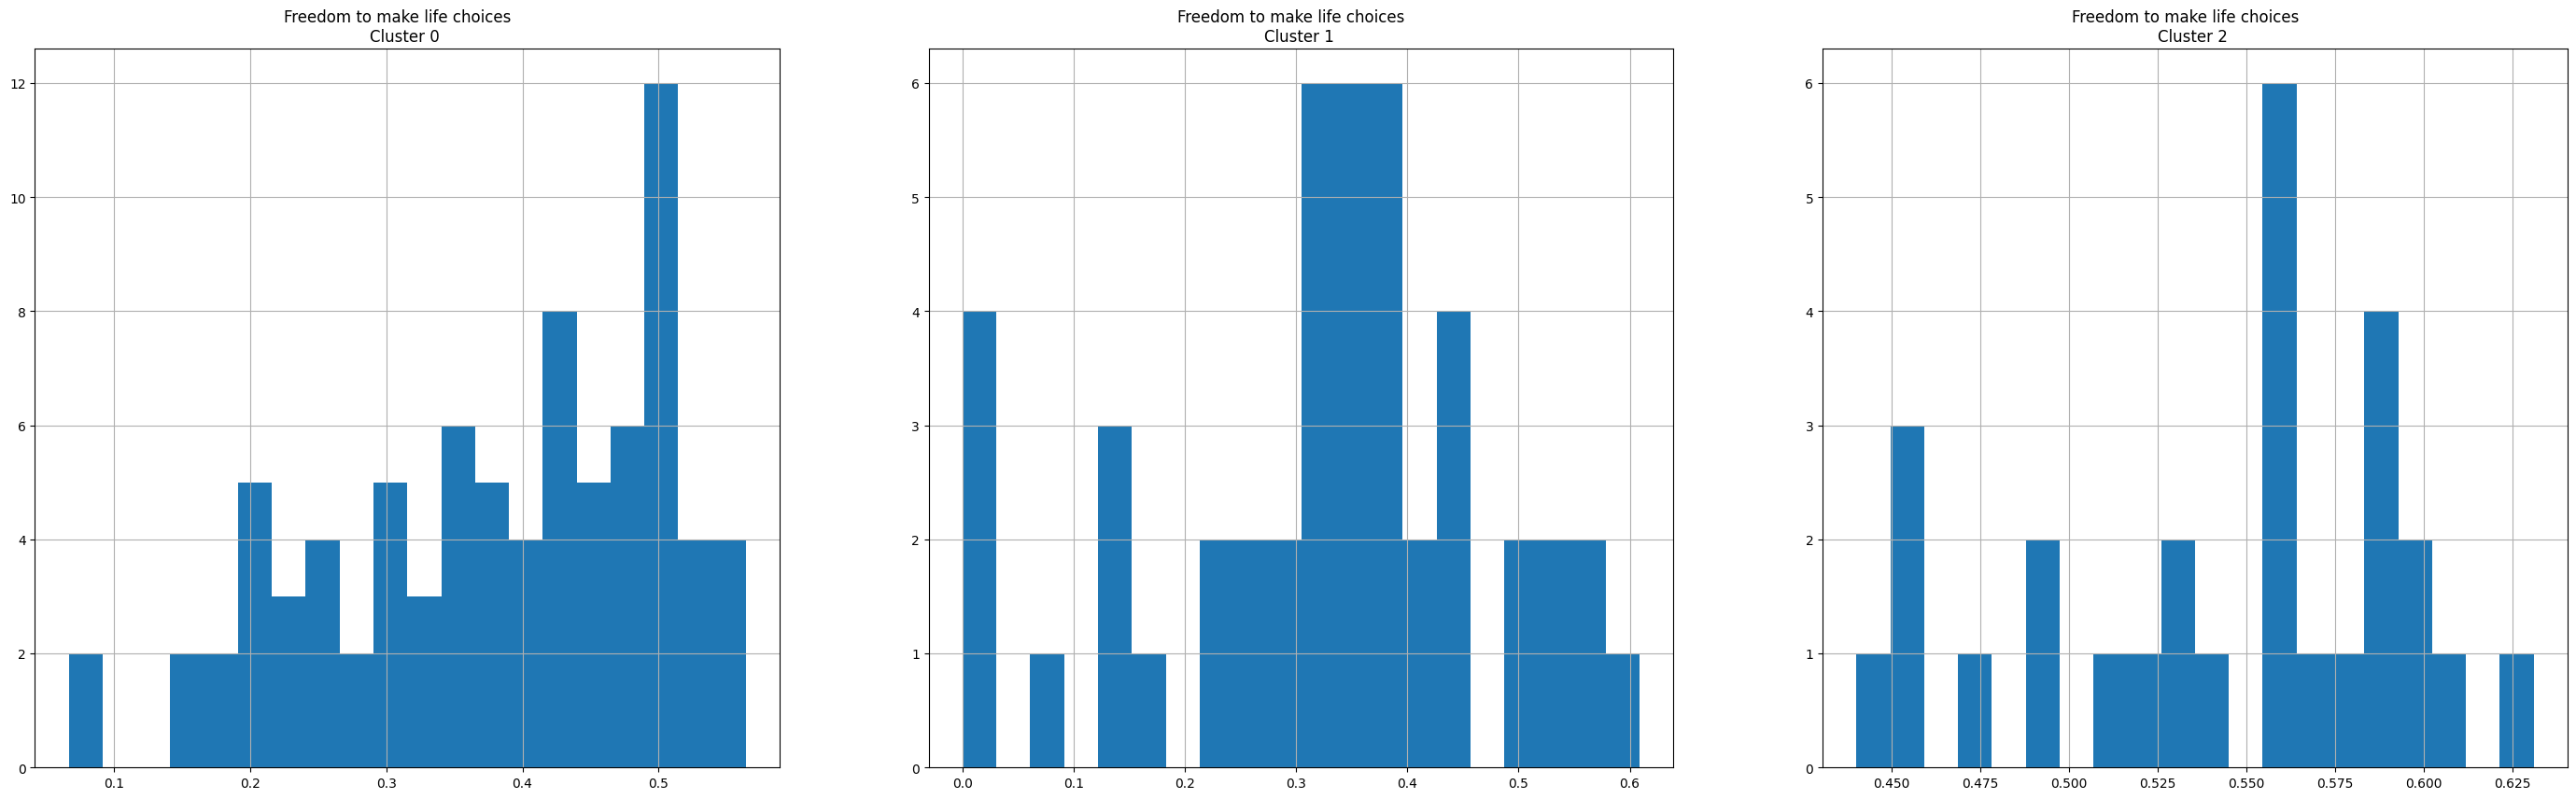

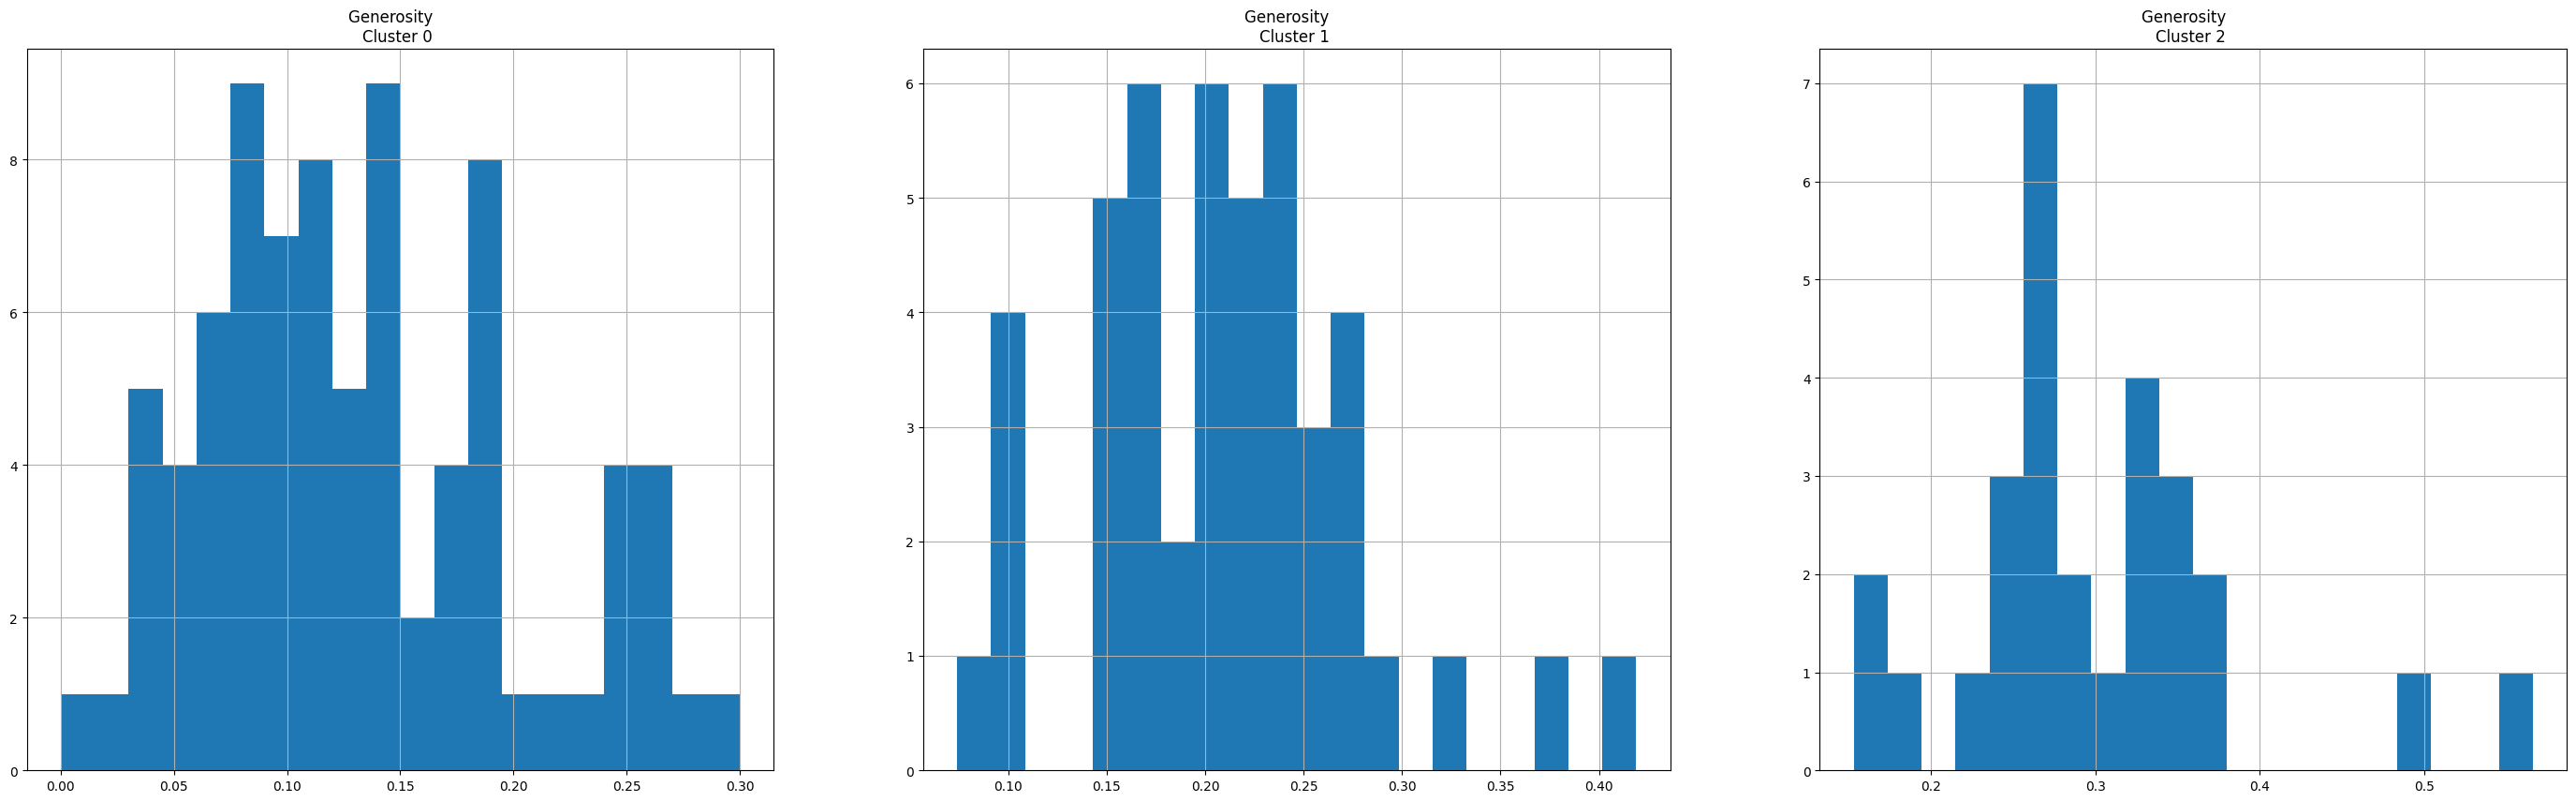

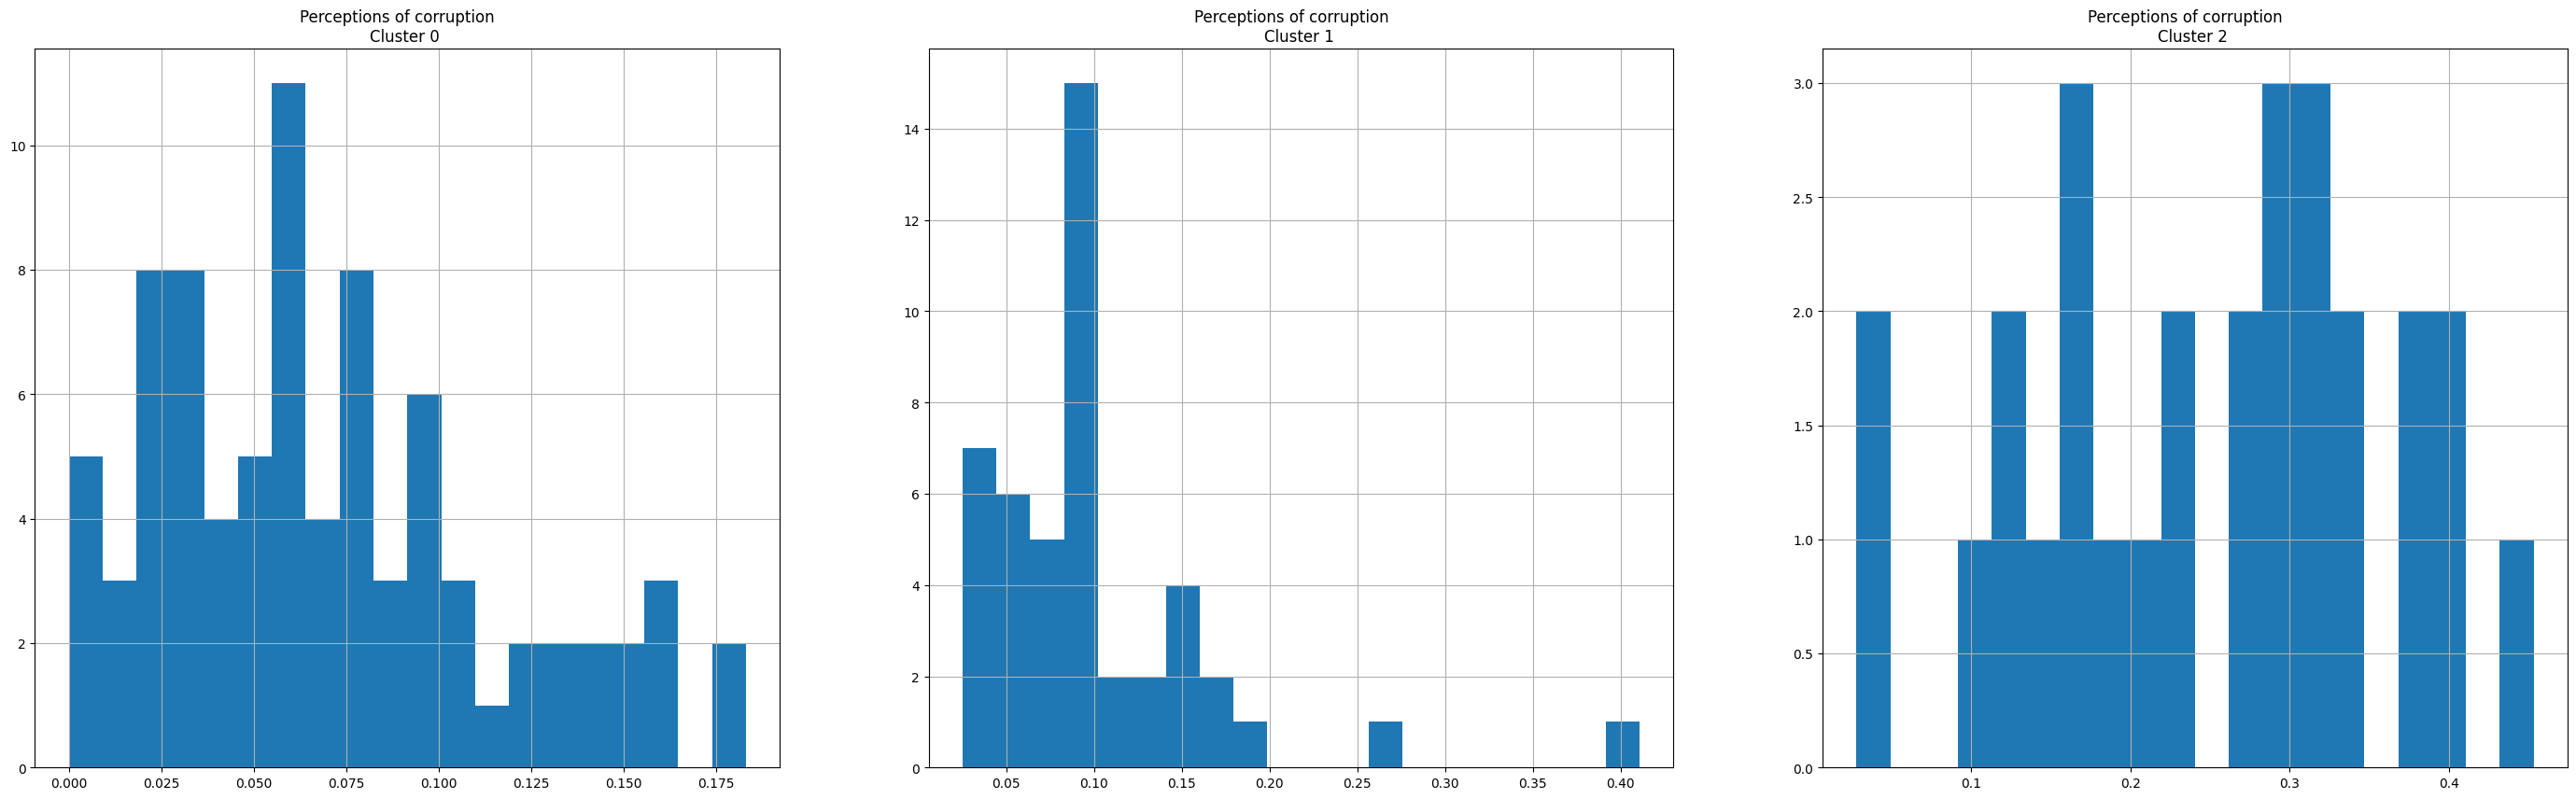

In [28]:
# Plot the histogram of various clusters
for i in df_seg.columns:
  plt.figure(figsize = (35, 10))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = happy_df_cluster[happy_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i, j))
  
  plt.show()



# TASK #9: VISUALIZE THE CLUSTERS

In [29]:
happy_df_cluster

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,cluster
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,1
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,1
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,1


In [30]:
# Plot the relationship between cluster and score 

fig = px.scatter(happy_df_cluster, x = 'cluster', y = "Score",
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Cluster'
)
fig.show()

In [31]:
# Plot the relationship between cluster and GDP

fig = px.scatter(happy_df_cluster, x='cluster', y='GDP per capita',
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='GDP vs Clusters'
)
fig.show()

In [32]:


fig = px.scatter_3d(happy_df_cluster, 
                    x='GDP per capita', 
                    y='Perceptions of corruption', 
                    z='Healthy life expectancy',
                    size='Score', 
                    color='cluster',  # Replace with your cluster column
                    hover_name='Country or region',
                    size_max=60,
                    title='Clusters based Impact of Economy, Corruption, and Life Expectancy on Happiness Scores of Nations')

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    height=650
)

fig.show()


In [33]:
# Visualizing the clusters geographically
data = dict(type = 'choropleth', 
           locations = happy_df_cluster["Country or region"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = happy_df_cluster['cluster'], 
           text = happy_df_cluster["Country or region"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Geographical Visualization of Clusters', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)